In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# from pandas_profiling import ProfileReport


In [41]:
df = pd.read_csv("AirlineCustSatis.csv")

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15190 entries, 0 to 15189
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Satisfaction                       15190 non-null  int64  
 1   Gender                             15190 non-null  object 
 2   Customer Type                      15190 non-null  object 
 3   Age                                15190 non-null  int64  
 4   Type of Travel                     15190 non-null  object 
 5   Class                              15190 non-null  object 
 6   Flight Distance                    15190 non-null  int64  
 7   Seat comfort                       15190 non-null  int64  
 8   Departure/Arrival time convenient  15190 non-null  int64  
 9   Food and drink                     15190 non-null  int64  
 10  Gate location                      15190 non-null  int64  
 11  Inflight wifi service              15190 non-null  int

In [43]:
# Count null values in each column
null_counts = df.isnull().sum()
print(null_counts)

Satisfaction                          0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Seat comfort                          0
Departure/Arrival time convenient     0
Food and drink                        0
Gate location                         0
Inflight wifi service                 0
Inflight entertainment                0
Online support                        0
Ease of Online booking                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Cleanliness                           0
Online boarding                       0
Departure Delay in Minutes            0
Arrival Delay in Minutes             68
dtype: int64


In [44]:
df.dropna(inplace = True)

In [45]:
df.columns

Index(['Satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [46]:
df.describe()

,Satisfaction,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,15122.000000,15122.000000,15122.000000,15122.000000,15122.000000,15122.000000,15122.000000,15122.000000,15122.000000,15122.000000,15122.000000,15122.000000,15122.000000,15122.000000,15122.000000,15122.000000,15122.000000,15122.000000,15122.000000
mean,0.415950,39.094829,1927.734294,2.272583,3.203214,2.152427,2.840233,3.187409,2.721730,3.382820,3.252281,3.290306,3.305978,3.559648,3.323105,3.578759,3.274435,15.839042,16.266036
std,0.492901,17.329849,926.033788,1.500444,1.553289,1.502982,1.247814,1.331624,1.552746,1.317895,1.257542,1.216294,1.355847,1.124741,1.254930,1.115530,1.301896,44.085990,44.393836
min,0.000000,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,25.000000,1373.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,0.000000,39.000000,1896.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,1.000000,53.000000,2427.000000,4.000000,5.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,13.000000,14.000000
max,1.000000,85.000000,6882.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


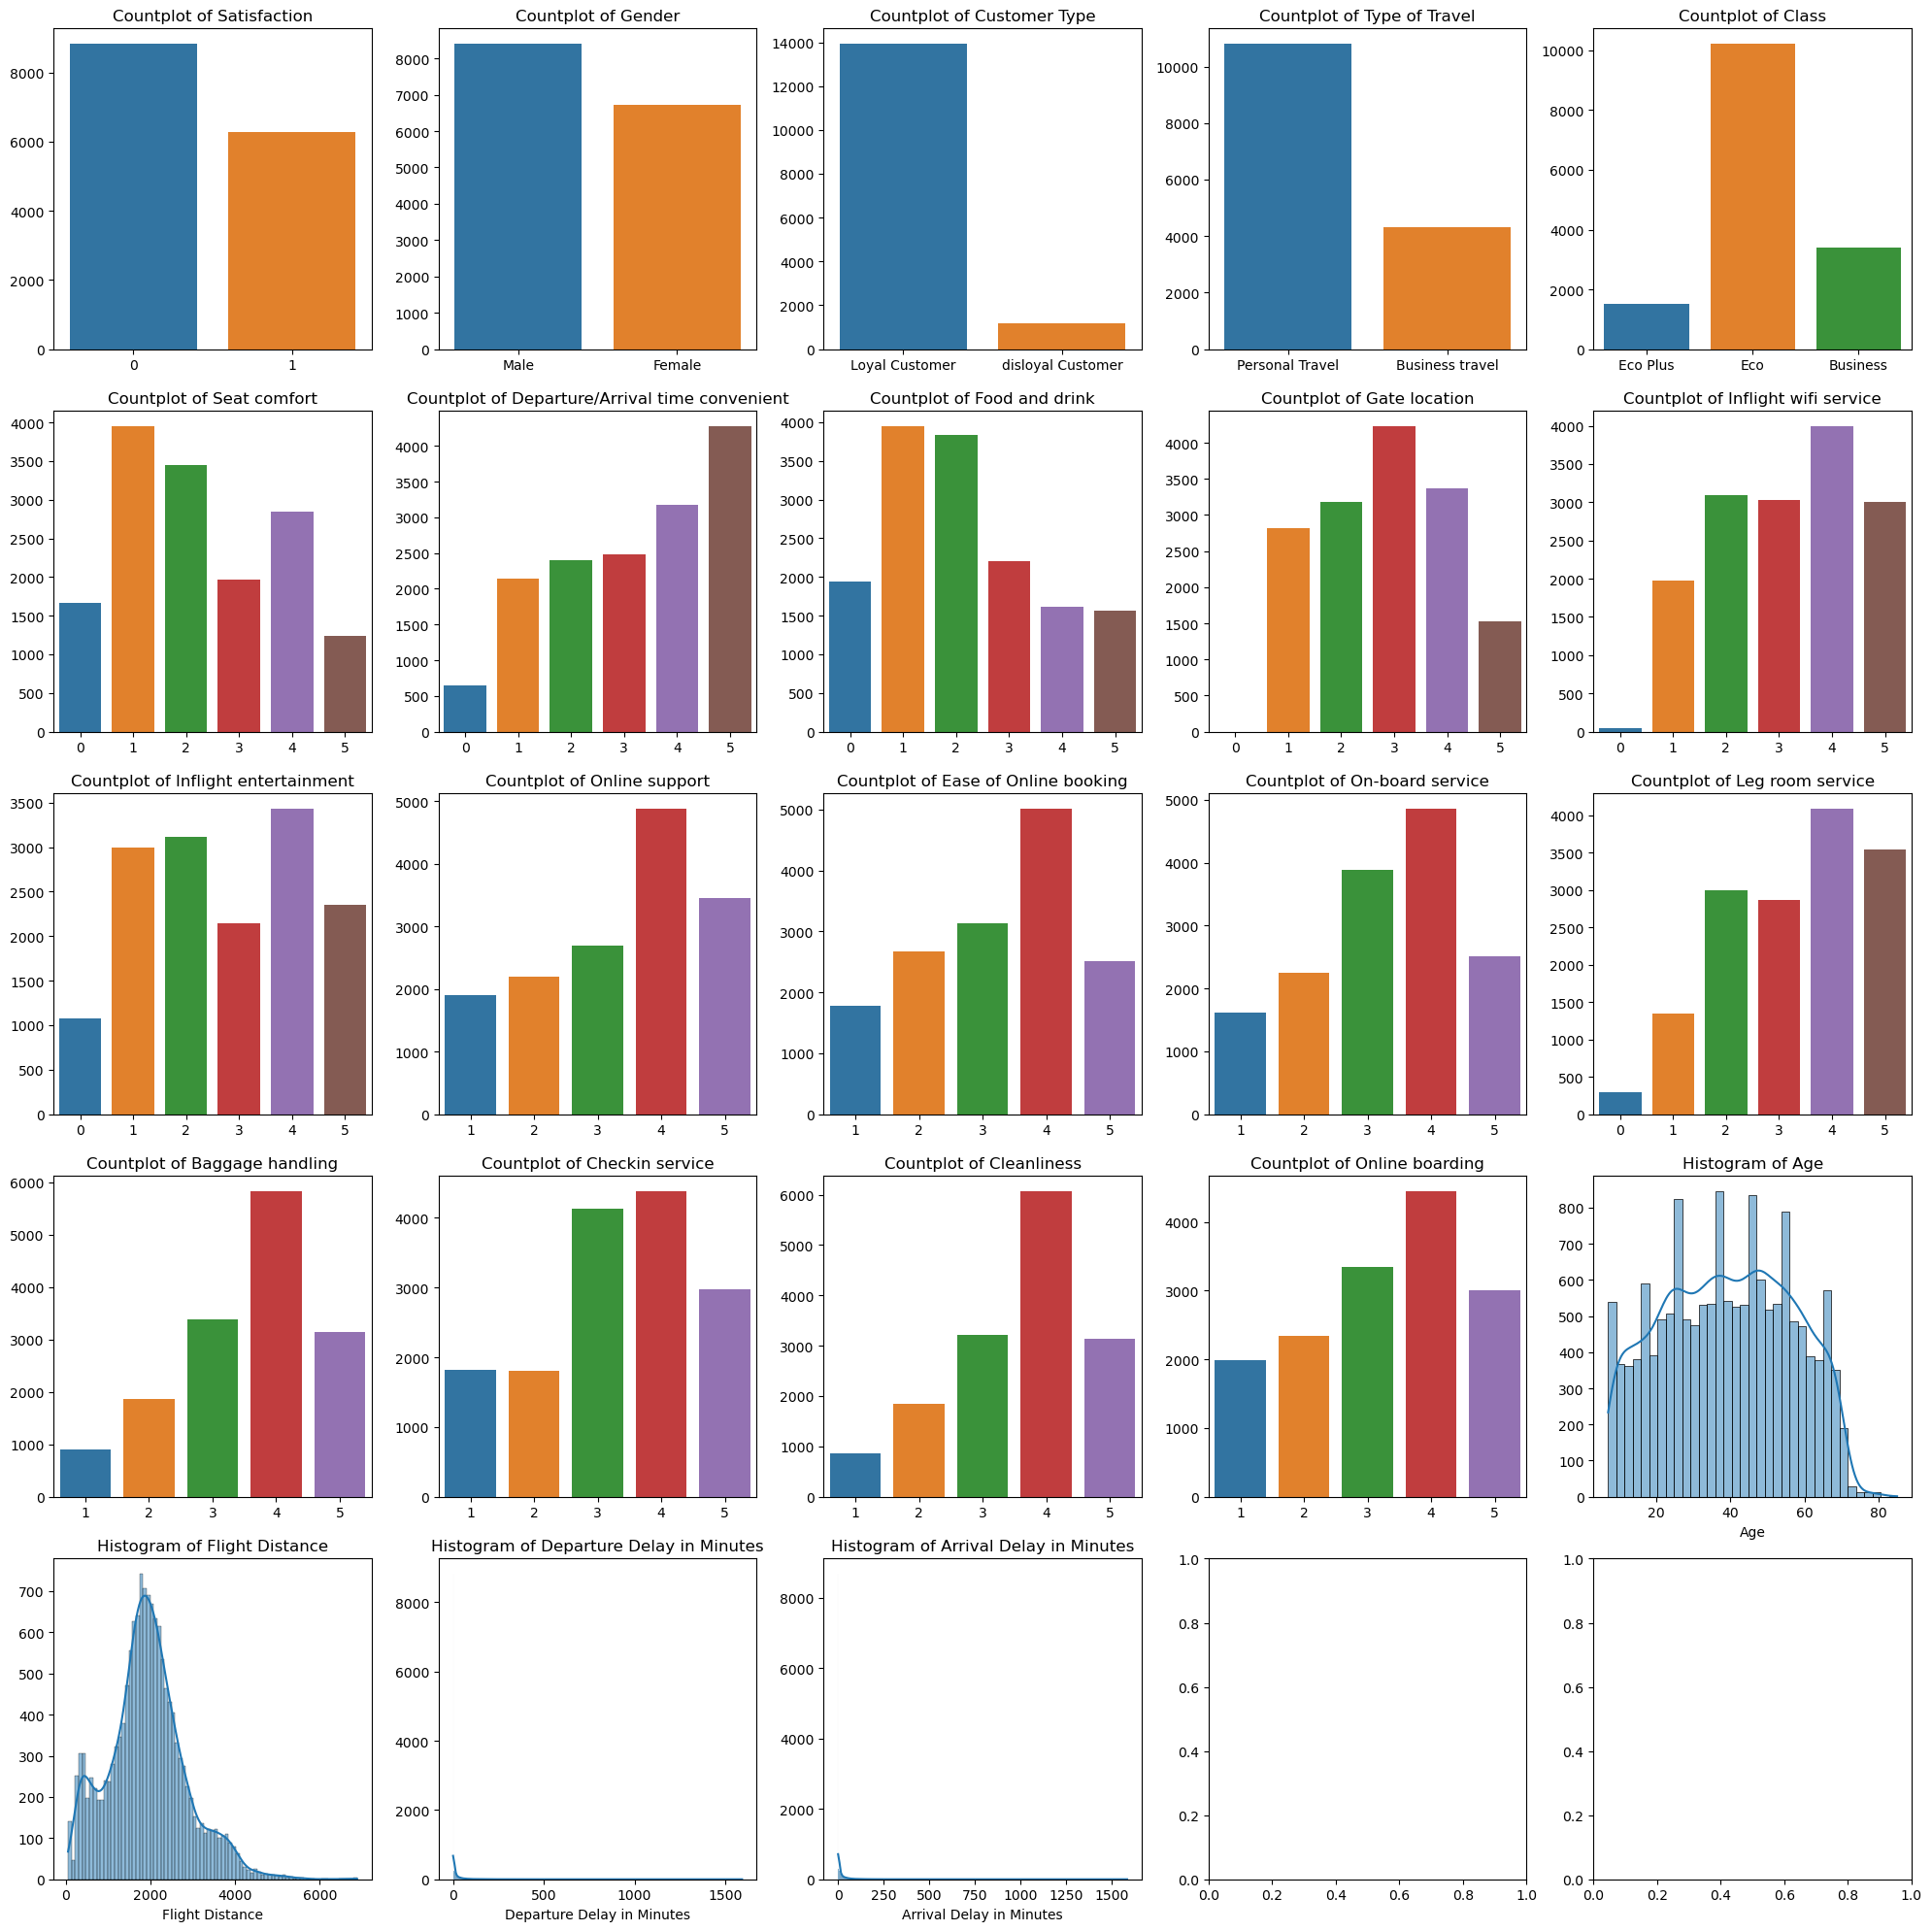

In [47]:
# Define the columns for univariate analysis
categorical_columns = ['Satisfaction', 'Gender', 'Customer Type', 'Type of Travel', 'Class',
                       'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink',
                       'Gate location', 'Inflight wifi service', 'Inflight entertainment', 'Online support',
                       'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling',
                       'Checkin service', 'Cleanliness', 'Online boarding']

numerical_columns = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 20))
axes = axes.flatten()

# Univariate Analysis - Countplots
for i, column in enumerate(categorical_columns):
    sns.countplot(x=column, data=df, ax=axes[i])
    axes[i].set_title(f'Countplot of {column}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Univariate Analysis - Histograms
for i, column in enumerate(numerical_columns):
    sns.histplot(df[column], kde=True, ax=axes[len(categorical_columns) + i])
    axes[len(categorical_columns) + i].set_title(f'Histogram of {column}')
    axes[len(categorical_columns) + i].set_xlabel(column)
    axes[len(categorical_columns) + i].set_ylabel('')

# Adjust layout
plt.tight_layout()
plt.show()

c:\Users\hamin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


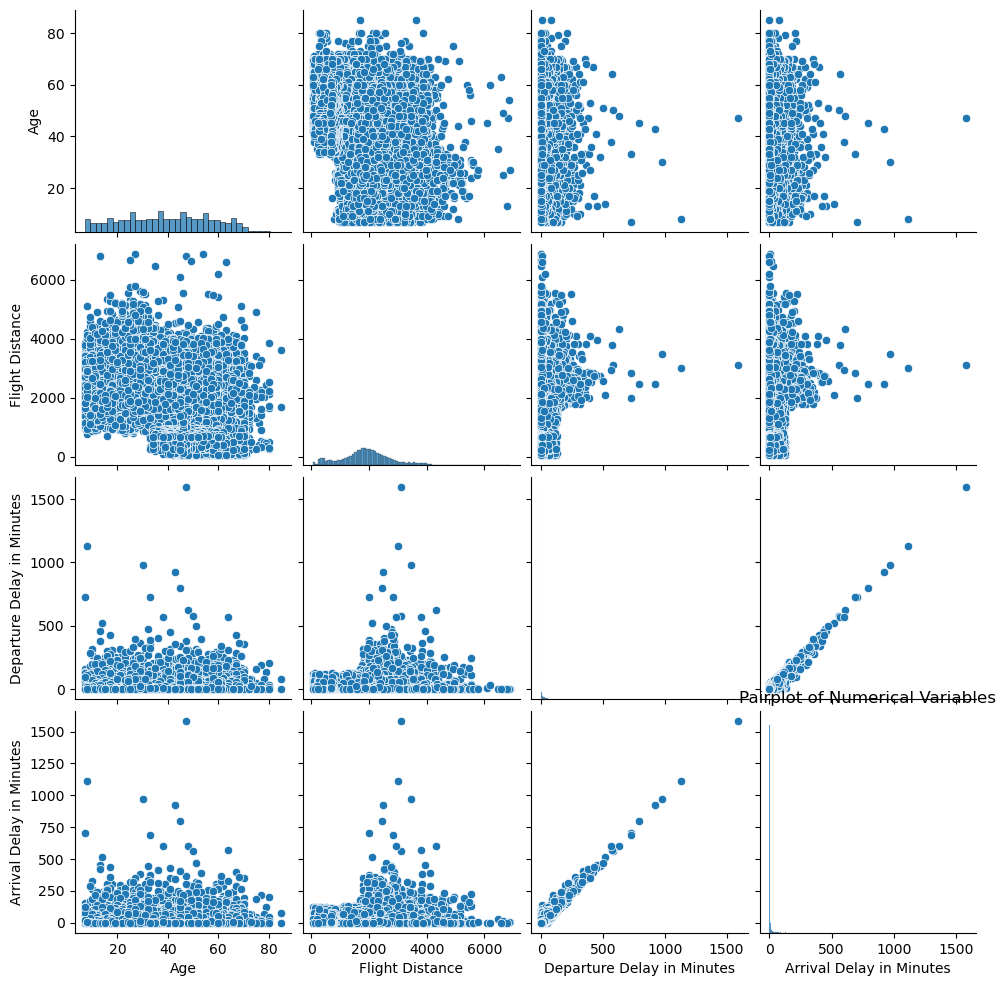

In [48]:
# Bivariate Analysis
sns.pairplot(df[['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']])
plt.title('Pairplot of Numerical Variables')
plt.show()

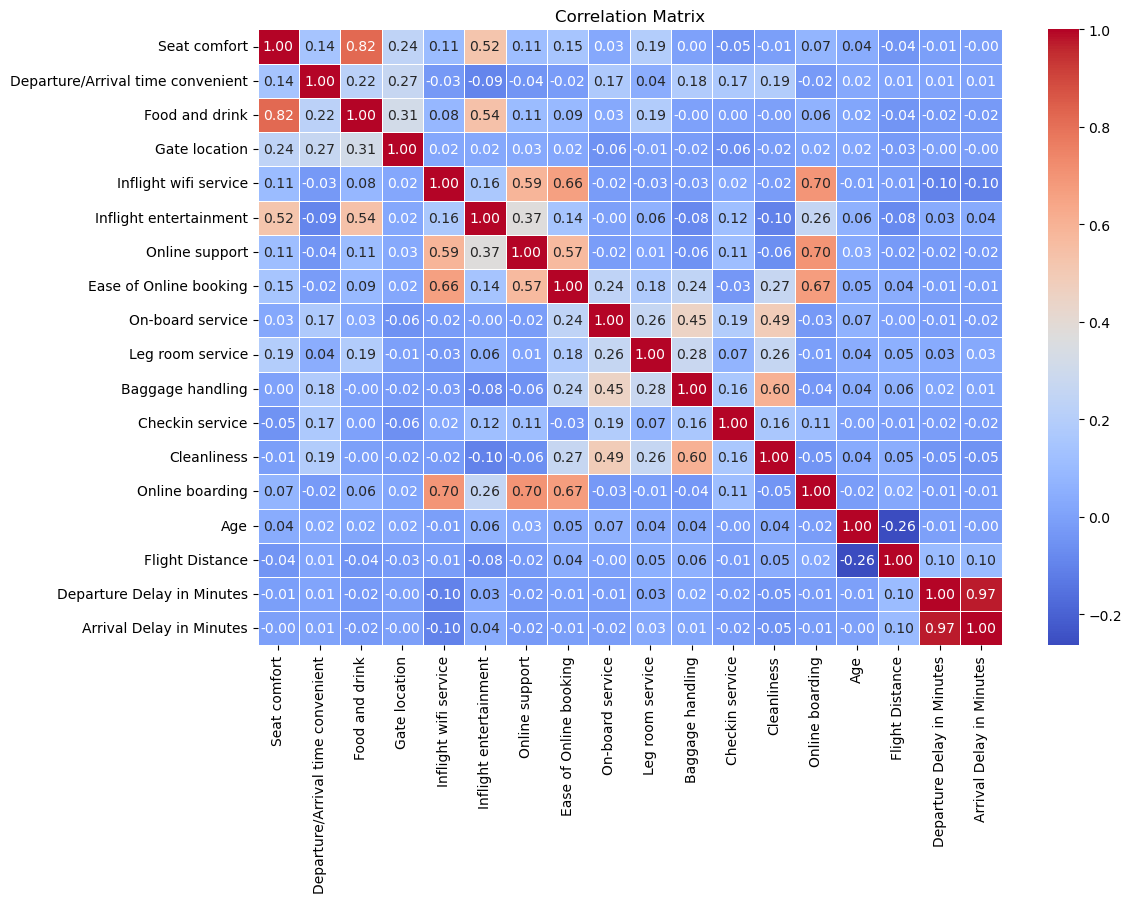

In [49]:
# Multivariate Analysis
plt.figure(figsize=(12, 8))
sns.heatmap(df[['Seat comfort', 'Departure/Arrival time convenient', 'Food and drink',
                       'Gate location', 'Inflight wifi service', 'Inflight entertainment', 'Online support',
                       'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling',
                       'Checkin service', 'Cleanliness', 'Online boarding','Age', 'Flight Distance', 
                       'Departure Delay in Minutes', 'Arrival Delay in Minutes']].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [50]:
def remove_outliers_iqr(df):
    """
    Remove outliers from numerical columns in a DataFrame using the Interquartile Range (IQR) method.
    
    Parameters:
        df (DataFrame): Input DataFrame.
    
    Returns:
        DataFrame: DataFrame with outliers removed.
    """
    # Copy the input DataFrame to avoid modifying the original DataFrame
    df_cleaned = df.copy()
    
    # Counter to keep track of the number of data points removed
    num_removed = 0
    
    # Iterate over numerical columns
    for column in df_cleaned.select_dtypes(include='number').columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        q1 = df_cleaned[column].quantile(0.25)
        q3 = df_cleaned[column].quantile(0.75)
        
        # Calculate IQR (Interquartile Range)
        iqr = q3 - q1
        
        # Define the lower and upper bounds for outliers
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        # Count outliers and replace with NaN
        outliers = (df_cleaned[column] < lower_bound) | (df_cleaned[column] > upper_bound)
        num_removed += outliers.sum()
        df_cleaned.loc[outliers, column] = np.nan
    
    # Drop rows containing NaN values (outliers)
    df_cleaned = df_cleaned.dropna()
    
    # Print the number of data points removed
    print(f"Number of data points removed: {num_removed}")
    
    return df_cleaned


In [51]:
# df = remove_outliers_iqr(df)

Too much outlier has been remove, let's run the model with the outlier to see the result

In [ ]:
# decision tree model

In [72]:
def build_classification_model(data, target_column, model_choice):
    """
    Build a classification model based on the user's choice of model and print out the top 3 important features.
    
    Parameters:
        data (DataFrame): The input DataFrame.
        target_column (str): The name of the target column.
        model_choice (str): The chosen classification model 
                            ('Random Forest', 'Decision Tree', 'Logistic Regression', 'SVM', 'Naive Bayes', or 'XGBoost').
    
    Returns:
        dict: A dictionary containing train score, test score, confusion matrix, and predictions.
    """
    # Extract features and target
    X = data.drop(columns=[target_column])
    y = data[target_column]
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize the chosen classification model
    if model_choice == 'Random Forest':
        model = RandomForestClassifier()
    elif model_choice == 'Decision Tree':
        model = DecisionTreeClassifier()
    elif model_choice == 'Logistic Regression':
        model = LogisticRegression()
    elif model_choice == 'SVM':
        model = SVC()
    elif model_choice == 'Naive Bayes':
        model = GaussianNB()
    elif model_choice == 'XGBoost':
        model = XGBClassifier()
    else:
        raise ValueError("Invalid model choice. Choose from 'Random Forest', 'Decision Tree', 'Logistic Regression', 'SVM', 'Naive Bayes', or 'XGBoost'.")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Get feature importance (if applicable)
    if hasattr(model, 'feature_importances_'):
        feature_importance = model.feature_importances_
        if len(feature_importance) >= 3:
            top_features_idx = np.argsort(feature_importance)[::-1][:3]
            top_features = X.columns[top_features_idx]
            print(f"Top 3 important features affecting {target_column}:")
            for i, feature in enumerate(top_features):
                print(f"{i+1}. {feature}")
        else:
            print("Feature importance is not available for this model.")
    else:
        print("Feature importance is not available for this model.")
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate train and test scores
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Create dictionary to store results
    results = {
        'train_score': train_score,
        'test_score': test_score,
        'confusion_matrix': conf_matrix,
        'predictions': y_pred
    }
    
    return results

In [54]:
df.columns

Index(['Satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [68]:
def create_dummy_data(data):
    """
    Generate dummy data for all categorical columns in the DataFrame.
    
    Parameters:
        data (DataFrame): The input DataFrame.
    
    Returns:
        DataFrame: A new DataFrame with dummy variables for all categorical columns.
    """
    # Get list of categorical columns
    categorical_columns = data.select_dtypes(include=['object']).columns
    
    # Create dummy variables for categorical columns
    dummy_data = pd.get_dummies(data, columns=categorical_columns)
    
    return dummy_data

In [73]:
df = create_dummy_data(df)

In [74]:
results = build_classification_model(df, "Satisfaction", "Decision Tree")
print("Train Score:", results['train_score'])
print("Test Score:", results['test_score'])
print("Confusion Matrix:")
print(results['confusion_matrix'])
print("Predictions:")
print(results['predictions'])

Top 3 important features affecting Satisfaction:
1. Gender
2. Type of Travel_Business travel
3. Inflight entertainment
Train Score: 1.0
Test Score: 0.9983471074380166
Confusion Matrix:
[[1772    2]
 [   3 1248]]
Predictions:
[0 0 0 ... 1 1 0]
